In [1]:
print sc.version

1.6.1


In [39]:
def project(rec):
    fields = rec.split(',')
    return (", ".join(list([fields[i] for i in [0, 1]])), fields[19])
def project(rec,delimiter=','):
    fields = rec.split(delimiter)
    return (", ".join(list([fields[i] for i in [0, 1]])), fields[19])

In [1]:
lines = sc.textFile("/tmp/passwd")

In [2]:
lines.first()

u'root:x:0:0:root:/root:/bin/bash'

In [3]:
lines.collect()

[u'root:x:0:0:root:/root:/bin/bash',
 u'bin:x:1:1:bin:/bin:/sbin/nologin',
 u'daemon:x:2:2:daemon:/sbin:/sbin/nologin',
 u'adm:x:3:4:adm:/var/adm:/sbin/nologin',
 u'lp:x:4:7:lp:/var/spool/lpd:/sbin/nologin',
 u'sync:x:5:0:sync:/sbin:/bin/sync',
 u'shutdown:x:6:0:shutdown:/sbin:/sbin/shutdown',
 u'halt:x:7:0:halt:/sbin:/sbin/halt',
 u'mail:x:8:12:mail:/var/spool/mail:/sbin/nologin',
 u'uucp:x:10:14:uucp:/var/spool/uucp:/sbin/nologin',
 u'operator:x:11:0:operator:/root:/sbin/nologin',
 u'games:x:12:100:games:/usr/games:/sbin/nologin',
 u'gopher:x:13:30:gopher:/var/gopher:/sbin/nologin',
 u'ftp:x:14:50:FTP User:/var/ftp:/sbin/nologin',
 u'nobody:x:99:99:Nobody:/:/sbin/nologin',
 u'vcsa:x:69:69:virtual console memory owner:/dev:/sbin/nologin',
 u'saslauth:x:499:76:Saslauthd user:/var/empty/saslauth:/sbin/nologin',
 u'postfix:x:89:89::/var/spool/postfix:/sbin/nologin',
 u'sshd:x:74:74:Privilege-separated SSH:/var/empty/sshd:/sbin/nologin',
 u'postgres:x:26:26:PostgreSQL Server:/var/lib/pgsq

In [5]:
lines.filter(lambda l:"home" in l ).collect()

[u'cloud-user:x:500:500:Cloud User:/home/cloud-user:/bin/bash',
 u'oozie:x:501:501::/home/oozie:/bin/bash',
 u'hive:x:502:501::/home/hive:/bin/bash',
 u'mapred:x:503:501::/home/mapred:/bin/bash',
 u'ambari-qa:x:1001:501::/home/ambari-qa:/bin/bash',
 u'zookeeper:x:505:501::/home/zookeeper:/bin/bash',
 u'tez:x:506:501::/home/tez:/bin/bash',
 u'hdfs:x:507:501::/home/hdfs:/bin/bash',
 u'yarn:x:508:501::/home/yarn:/bin/bash',
 u'hcat:x:509:501::/home/hcat:/bin/bash',
 u'spark:x:510:501::/home/spark:/bin/bash',
 u'ams:x:511:501::/home/ams:/bin/bash']

In [37]:
users = lines.map(lambda line: line.split(":")).map(lambda l : [l[0],l[5],l[6]] )
users.collect()

[[u'root', u'/root', u'/bin/bash'],
 [u'bin', u'/bin', u'/sbin/nologin'],
 [u'daemon', u'/sbin', u'/sbin/nologin'],
 [u'adm', u'/var/adm', u'/sbin/nologin'],
 [u'lp', u'/var/spool/lpd', u'/sbin/nologin'],
 [u'sync', u'/sbin', u'/bin/sync'],
 [u'shutdown', u'/sbin', u'/sbin/shutdown'],
 [u'halt', u'/sbin', u'/sbin/halt'],
 [u'mail', u'/var/spool/mail', u'/sbin/nologin'],
 [u'uucp', u'/var/spool/uucp', u'/sbin/nologin'],
 [u'operator', u'/root', u'/sbin/nologin'],
 [u'games', u'/usr/games', u'/sbin/nologin'],
 [u'gopher', u'/var/gopher', u'/sbin/nologin'],
 [u'ftp', u'/var/ftp', u'/sbin/nologin'],
 [u'nobody', u'/', u'/sbin/nologin'],
 [u'vcsa', u'/dev', u'/sbin/nologin'],
 [u'saslauth', u'/var/empty/saslauth', u'/sbin/nologin'],
 [u'postfix', u'/var/spool/postfix', u'/sbin/nologin'],
 [u'sshd', u'/var/empty/sshd', u'/sbin/nologin'],
 [u'postgres', u'/var/lib/pgsql', u'/bin/bash'],
 [u'dbus', u'/', u'/sbin/nologin'],
 [u'ntp', u'/etc/ntp', u'/sbin/nologin'],
 [u'mysql', u'/var/lib/mysql'

In [7]:
nums = sc.parallelize([1, 2, 3, 4])
squared = nums.map(lambda x: x * x).collect()
for num in squared:
    print "%i " % (num)

1 
4 
9 
16 


In [8]:
from pyspark.mllib.clustering import KMeans
from numpy import array
from pyspark import SparkContext

In [9]:
training_data = array([[1,1],[2,2],[1,3],[0.5,0],[0.3,3],[0.9,0.8],[0.9,1.2],[1.1,0.8],[1.8,1.5],[0.8,2.1],
                 [3.1,3.3],[3.2,2.9],[3,5],[2.9,4.5],[0.3,0.4],[3,3],[4,4],[3.5,3.1],[3.9,4.2],[2.5,2.9]])

In [10]:
dist_training_data = sc.parallelize(training_data)

In [11]:
clusters = KMeans.train(dist_training_data, 2, maxIterations=10, runs=10, initializationMode="random")

/usr/hdp/2.4.2.0-258/spark/python/pyspark/mllib/clustering.py:176: UserWarning: Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.
  "Support for runs is deprecated in 1.6.0. This param will have no effect in 1.7.0.")


In [12]:
clusters.centers

[array([ 3.23333333,  3.65555556]), array([ 0.96363636,  1.43636364])]

In [13]:
clusters.predict([1,4])

0

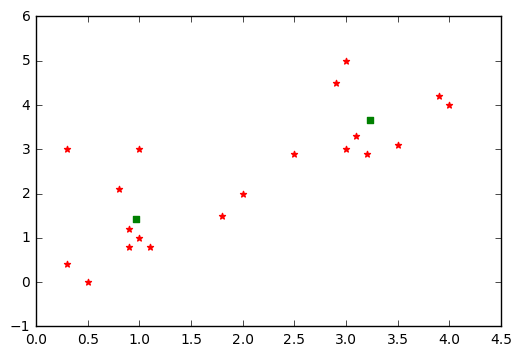

In [16]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(*zip(*training_data), color='r', marker='*') 
plt.scatter(*zip(*clusters.centers), color='g', marker='s')